# 12. Deflategate - football dataset

## Background
In the AFC championship game between the Indianapolis Colts and the New England Patriots on January 18, 2015, allegations arose that the Patriots' footballs were not inflated according to regulations, potentially giving them an advantage. This controversy, dubbed "Deflategate," led to an independent analysis commissioned by the National Football League (NFL).

## Data and Preprocessing
The pressure of footballs is measured in pounds per square inch (psi). NFL rules dictate that game balls must be inflated within the range of 12.5 psi to 13.5 psi. The provided dataset includes measurements taken by two officials, Clete Blakeman and Dyrol Prioleau, during the AFC game.

- The average pressure drop for each football was calculated as the average of measurements made by the two officials.
- The drop in pressure for each football was computed by subtracting the combined pressure measurement from the starting pressure.

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

football = pd.read_csv('football.csv')
football

,Team,Ball,Blakeman,Prioleau
0,0,Patriots 1,11.50,11.80
1,0,Patriots 2,10.85,11.20
2,0,Patriots 3,11.15,11.50
3,0,Patriots 4,10.70,11.00
4,0,Patriots 5,11.10,11.45
5,0,Patriots 6,11.60,11.95
6,0,Patriots 7,11.85,12.30
7,0,Patriots 8,11.10,11.55
8,0,Patriots 9,10.95,11.35
9,0,Patriots 10,10.50,10.90


We will assign to each the ball the average of the two measurements made on that ball.

In [30]:
football['Combined'] = football[['Blakeman', 'Prioleau']].mean(axis=1, skipna=True)
football.head()

,Team,Ball,Blakeman,Prioleau,Combined
0,0,Patriots 1,11.50,11.80,11.650
1,0,Patriots 2,10.85,11.20,11.025
2,0,Patriots 3,11.15,11.50,11.325
3,0,Patriots 4,10.70,11.00,10.850
4,0,Patriots 5,11.10,11.45,11.275


## Average Pressure Drops
Recall that the Patriots’ balls had all started out at about 12.5 psi, and the Colts’ balls at about 13.0 psi.

=> Drop in pressure = initial value - combined score

In [37]:
initial_patriots = 12.5
initial_colts = 13
drop_patriots = initial_patriots - football[football['Team'] == 0]['Combined']
drop_colts = initial_colts - football[football['Team'] == 1]['Combined']

football['Drop Patriots'] = drop_patriots
football['Drop Colts'] = drop_colts
football['Drop'] = pd.concat([drop_patriots, drop_colts])

football

,Team,Ball,Blakeman,Prioleau,Combined,Drop,Drop Patriots,Drop Colts
0,0,Patriots 1,11.50,11.80,11.650,0.850,0.850,NaN
1,0,Patriots 2,10.85,11.20,11.025,1.475,1.475,NaN
2,0,Patriots 3,11.15,11.50,11.325,1.175,1.175,NaN
3,0,Patriots 4,10.70,11.00,10.850,1.650,1.650,NaN
4,0,Patriots 5,11.10,11.45,11.275,1.225,1.225,NaN
5,0,Patriots 6,11.60,11.95,11.775,0.725,0.725,NaN
6,0,Patriots 7,11.85,12.30,12.075,0.425,0.425,NaN
7,0,Patriots 8,11.10,11.55,11.325,1.175,1.175,NaN
8,0,Patriots 9,10.95,11.35,11.150,1.350,1.350,NaN
9,0,Patriots 10,10.50,10.90,10.700,1.800,1.800,NaN


In [40]:
def average_drop(dataset, group_dropcolumn):
    avg = dataset[group_dropcolumn].mean()
    return avg

print(average_drop(football, 'Drop Patriots'))
print(average_drop(football, 'Drop Colts'))

1.202272727272728
0.46875


Upon analysing the data, it appears that the Patriots' footballs had a larger average pressure drop compared to the Colts' footballs. The average drop for the Patriots was approximately 1.2 psi, while the Colts had an average drop of about 0.47 psi.

## Hypotheses
To assess whether the observed difference is significant, a hypothesis test was conducted. The null hypothesis assumes that the Patriots' drops are a random sample of all drops, while the alternative hypothesis posits that the Patriots' drops are too large on average to be random.

## Test Statistic
The test statistic is the difference between the average drops for the Patriots and Colts. The observed difference was approximately 0.73 psi.

In [41]:
observed_difference = abs(average_drop(football, 'Drop Patriots') - average_drop(football, 'Drop Colts'))
observed_difference

0.733522727272728

## Permutation Test
A permutation test involved simulating the test statistic under the null hypothesis by randomly shuffling team labels. This process was repeated 10,000 times, resulting in a distribution of simulated differences.

1. Diff of means for any table (test: result should = observed_difference)
2. Shuffle n times then append

In [46]:
reduced_table = football[['Team', 'Drop']]
reduced_table.head()

,Team,Drop
0,0,0.850
1,0,1.475
2,0,1.175
3,0,1.650
4,0,1.225


In [52]:
# Testing if my shuffling codes work
reduced_table['Shuffled Team'] = reduced_table['Team'].sample(frac=1).reset_index(drop=True)
reduced_table

,Team,Drop,Shuffled Team
0,0,0.850,0
1,0,1.475,0
2,0,1.175,0
3,0,1.650,1
4,0,1.225,1
5,0,0.725,0
6,0,0.425,0
7,0,1.175,1
8,0,1.350,0
9,0,1.800,0


In [71]:
# 1
def difference_of_means(dataset, group_column):
    means = reduced_table.groupby(group_column)['Drop'].mean().reset_index()
    dim = abs(means.loc[0, 'Drop'] - means.loc[1, 'Drop'])
    return dim

# test
difference_of_means(reduced_table, 'Team')

0.733522727272728

,Simulation,Difference of means
0,1,0.392614
1,2,0.102841
2,3,0.263636
3,4,0.162500
4,5,0.007955


<Axes: xlabel='Difference of means', ylabel='Count'>

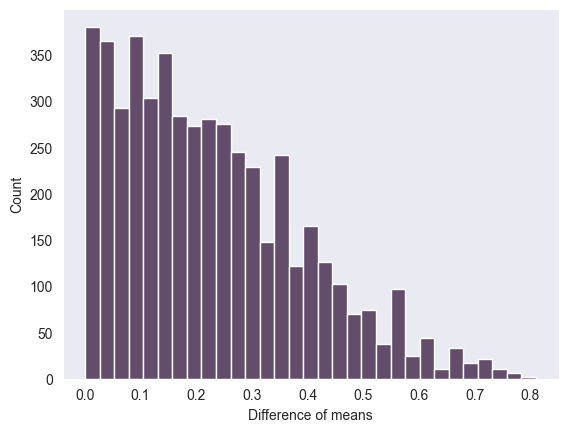

In [85]:
# 2
def simulation():
    data = []
    for i in range(1, rep+1):
        #shuffling
        reduced_table['Shuffled Team'] = reduced_table['Team'].sample(frac=1).reset_index(drop=True)
        #call dim function
        dim = difference_of_means(reduced_table, 'Shuffled Team')
        #append
        data.append({
            'Simulation': i,
            'Difference of means': dim
        })
    datadf = pd.DataFrame(data)
    return datadf

rep = int(input("Number of simulations:"))
datadf = simulation()
display(datadf.head())

sns.set_style('dark')
sns.set_palette('rocket')
sns.histplot(datadf, x='Difference of means')

In [87]:
p = np.count_nonzero(datadf['Difference of means']>= observed_difference) / rep
p

0.003

## Conclusion
The empirical p-value, representing the probability of obtaining a test statistic as extreme as the observed difference under the null hypothesis, was calculated as 0.0026 (0.3 - 0.5 in my example depending on rep). This low p-value led to the rejection of the null hypothesis, suggesting that the Patriots' larger pressure drops were unlikely to be due to chance alone.

The independent investigative team's official report aligned with this analysis, stating that the average pressure drop of Patriots' footballs exceeded that of Colts' footballs by 0.45 to 1.02 psi.